🚀 AWS Data Science Environment Test
Current Time: 2025-07-23 19:20:29

✅ AWS S3 Connected!
   Found 2 S3 buckets:
   • sagemaker-studio-149536481477-ilxu92s9dyq (Created: 2025-07-17)
   • sagemaker-us-east-1-149536481477 (Created: 2025-07-17)

✅ AWS Identity Verified:
   User: data-scientist
   Account: 149536481477

📊 Data Processing Demo:
   • Generated 30 rows of sample data
   • Average daily sales: $516.70
   • Total customers: 1668


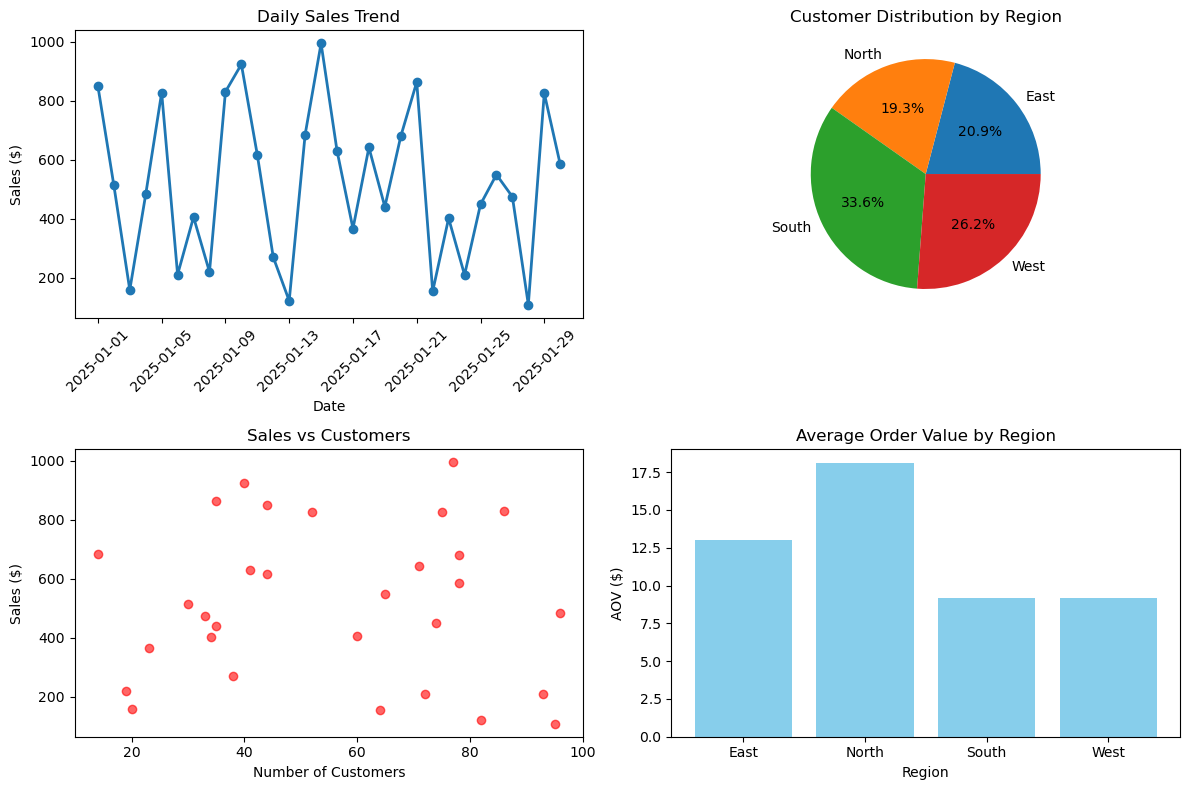


📈 Data Summary:
                      date       sales  customers  avg_order_value
count                   30   30.000000  30.000000        30.000000
mean   2025-01-15 12:00:00  516.700000  55.600000        11.846172
min    2025-01-01 00:00:00  109.000000  14.000000         1.147368
25%    2025-01-08 06:00:00  294.250000  35.000000         6.851316
50%    2025-01-15 12:00:00  498.500000  56.000000        10.351395
75%    2025-01-22 18:00:00  684.500000  76.500000        15.141168
max    2025-01-30 00:00:00  995.000000  96.000000        49.000000
std                    NaN  262.388912  24.910322         9.272652

🎉 INTEGRATION TEST COMPLETE!
✅ AWS S3: Connected
✅ AWS IAM: Authenticated
✅ Python: Working
✅ Pandas: Data processing ready
✅ Matplotlib: Visualization ready
✅ Jupyter: Interactive environment active
✅ Environment: Fully integrated!


In [1]:
# AWS + Python + Jupyter Integration Demo
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("🚀 AWS Data Science Environment Test")
print("=" * 50)
print(f"Current Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

# Test 1: AWS S3 Connection
try:
    s3 = boto3.client('s3')
    buckets = s3.list_buckets()
    print(f"\n✅ AWS S3 Connected!")
    print(f"   Found {len(buckets['Buckets'])} S3 buckets:")
    
    for bucket in buckets['Buckets']:
        created = bucket['CreationDate'].strftime('%Y-%m-%d')
        print(f"   • {bucket['Name']} (Created: {created})")
        
except Exception as e:
    print(f"❌ AWS S3 Error: {e}")

# Test 2: AWS Identity
try:
    sts = boto3.client('sts')
    identity = sts.get_caller_identity()
    print(f"\n✅ AWS Identity Verified:")
    print(f"   User: {identity['Arn'].split('/')[-1]}")
    print(f"   Account: {identity['Account']}")
except Exception as e:
    print(f"❌ AWS Identity Error: {e}")

# Test 3: Data Processing Demo
print(f"\n📊 Data Processing Demo:")

# Create sample data
sample_data = {
    'date': pd.date_range('2025-01-01', periods=30, freq='D'),
    'sales': np.random.randint(100, 1000, 30),
    'customers': np.random.randint(10, 100, 30),
    'region': np.random.choice(['North', 'South', 'East', 'West'], 30)
}

df = pd.DataFrame(sample_data)
df['avg_order_value'] = df['sales'] / df['customers']

print(f"   • Generated {len(df)} rows of sample data")
print(f"   • Average daily sales: ${df['sales'].mean():.2f}")
print(f"   • Total customers: {df['customers'].sum()}")

# Test 4: Data Visualization
plt.figure(figsize=(12, 8))

# Subplot 1: Sales trend
plt.subplot(2, 2, 1)
plt.plot(df['date'], df['sales'], marker='o', linewidth=2)
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.xticks(rotation=45)

# Subplot 2: Customer distribution by region
plt.subplot(2, 2, 2)
region_customers = df.groupby('region')['customers'].sum()
plt.pie(region_customers.values, labels=region_customers.index, autopct='%1.1f%%')
plt.title('Customer Distribution by Region')

# Subplot 3: Sales vs Customers correlation
plt.subplot(2, 2, 3)
plt.scatter(df['customers'], df['sales'], alpha=0.6, c='red')
plt.xlabel('Number of Customers')
plt.ylabel('Sales ($)')
plt.title('Sales vs Customers')

# Subplot 4: Average order value by region
plt.subplot(2, 2, 4)
avg_order_by_region = df.groupby('region')['avg_order_value'].mean()
plt.bar(avg_order_by_region.index, avg_order_by_region.values, color='skyblue')
plt.title('Average Order Value by Region')
plt.xlabel('Region')
plt.ylabel('AOV ($)')

plt.tight_layout()
plt.show()

# Test 5: Summary Statistics
print(f"\n📈 Data Summary:")
print(df.describe())

print(f"\n🎉 INTEGRATION TEST COMPLETE!")
print("=" * 50)
print("✅ AWS S3: Connected")
print("✅ AWS IAM: Authenticated") 
print("✅ Python: Working")
print("✅ Pandas: Data processing ready")
print("✅ Matplotlib: Visualization ready")
print("✅ Jupyter: Interactive environment active")
print("✅ Environment: Fully integrated!")

In [4]:
# AWS S3 Data Upload Demo - Fixed Version
import json

# Convert DataFrame to JSON-serializable format
def make_json_serializable(obj):
    """Convert pandas objects to JSON serializable format"""
    if hasattr(obj, 'isoformat'):  # datetime objects
        return obj.isoformat()
    elif hasattr(obj, 'item'):  # numpy objects
        return obj.item()
    else:
        return obj

# Create sample JSON data with proper serialization
df_records = df.head(5).copy()  # First 5 rows
df_records['date'] = df_records['date'].dt.strftime('%Y-%m-%d')  # Convert dates to strings

sample_json_data = {
    "project": "aws-jupyter-integration", 
    "timestamp": datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    "data": df_records.to_dict('records'),
    "summary": {
        "total_sales": int(df['sales'].sum()),
        "avg_customers": round(df['customers'].mean(), 2),
        "total_customers": int(df['customers'].sum()),
        "date_range": {
            "start": df['date'].min().strftime('%Y-%m-%d'),
            "end": df['date'].max().strftime('%Y-%m-%d')
        }
    },
    "statistics": {
        "max_sales": int(df['sales'].max()),
        "min_sales": int(df['sales'].min()),
        "avg_order_value": round(df['avg_order_value'].mean(), 2)
    }
}

# Convert to JSON string
json_data = json.dumps(sample_json_data, indent=2)

print("📤 Sample data prepared for S3 upload:")
print(json_data[:800] + "..." if len(json_data) > 800 else json_data)

print(f"\n💾 Data ready to upload to S3!")
print(f"   • File size: {len(json_data)} characters")
print(f"   • Records included: {len(sample_json_data['data'])}")
print(f"   • Total sales: ${sample_json_data['summary']['total_sales']:,}")
print(f"   • Average customers per day: {sample_json_data['summary']['avg_customers']}")

# Save to local file for testing
filename = 'sample_data.json'
with open(filename, 'w') as f:
    f.write(json_data)
    
print(f"\n📁 Data saved locally as: {filename}")

📤 Sample data prepared for S3 upload:
{
  "project": "aws-jupyter-integration",
  "timestamp": "2025-07-23 19:23:26",
  "data": [
    {
      "date": "2025-01-01",
      "sales": 850,
      "customers": 44,
      "region": "North",
      "avg_order_value": 19.318181818181817
    },
    {
      "date": "2025-01-02",
      "sales": 514,
      "customers": 30,
      "region": "East",
      "avg_order_value": 17.133333333333333
    },
    {
      "date": "2025-01-03",
      "sales": 159,
      "customers": 20,
      "region": "East",
      "avg_order_value": 7.95
    },
    {
      "date": "2025-01-04",
      "sales": 483,
      "customers": 96,
      "region": "South",
      "avg_order_value": 5.03125
    },
    {
      "date": "2025-01-05",
      "sales": 828,
      "customers": 75,
      "region": "South",
      "avg_order_valu...

💾 Data ready to upload to S3!
   • File size: 1100 characters
   • Records included: 5
   • Total sales: $15,501
   • Average customers per day: 55.6

📁 Data

In [5]:
# AWS S3 Upload Demo
import boto3
from botocore.exceptions import ClientError

# S3 client
s3_client = boto3.client('s3')

# Use existing bucket (one of your SageMaker buckets)
bucket_name = 'sagemaker-studio-149536481477-ilxu92s9dyq'
file_key = 'data-science-demo/sample_data.json'

try:
    # Upload JSON data to S3
    s3_client.put_object(
        Bucket=bucket_name,
        Key=file_key,
        Body=json_data,
        ContentType='application/json'
    )
    
    print(f"✅ Successfully uploaded to S3!")
    print(f"   • Bucket: {bucket_name}")
    print(f"   • Key: {file_key}")
    print(f"   • Size: {len(json_data)} bytes")
    
    # Generate presigned URL for sharing
    url = s3_client.generate_presigned_url(
        'get_object',
        Params={'Bucket': bucket_name, 'Key': file_key},
        ExpiresIn=3600  # 1 hour
    )
    
    print(f"\n🔗 Shareable URL (expires in 1 hour):")
    print(url[:100] + "...")
    
except ClientError as e:
    print(f"❌ Upload failed: {e}")
    
# List files in the bucket
try:
    response = s3_client.list_objects_v2(Bucket=bucket_name, Prefix='data-science-demo/')
    if 'Contents' in response:
        print(f"\n📂 Files in bucket under 'data-science-demo/':")
        for obj in response['Contents']:
            size_kb = obj['Size'] / 1024
            modified = obj['LastModified'].strftime('%Y-%m-%d %H:%M:%S')
            print(f"   • {obj['Key']} ({size_kb:.1f} KB, {modified})")
    else:
        print("\n📂 No files found in data-science-demo/ folder")
        
except ClientError as e:
    print(f"❌ List failed: {e}")

✅ Successfully uploaded to S3!
   • Bucket: sagemaker-studio-149536481477-ilxu92s9dyq
   • Key: data-science-demo/sample_data.json
   • Size: 1100 bytes

🔗 Shareable URL (expires in 1 hour):
https://sagemaker-studio-149536481477-ilxu92s9dyq.s3.amazonaws.com/data-science-demo/sample_data.jso...

📂 Files in bucket under 'data-science-demo/':
   • data-science-demo/sample_data.json (1.1 KB, 2025-07-23 17:23:54)
